<a href="https://colab.research.google.com/github/iomiranda/gme_reddit_stock/blob/main/ComparingGMEwithReddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Looking at Reddit mentioning GME with their stock prices

The subreddit r/wallstreetbets made alot of noise this year with the GME stocks. So I will be looking at when GME is mentioned in a post, and if it correlates with the GME Open prices.

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
reddit_df = pd.read_csv(r'./reddit_wsb.csv')

https://www.kaggle.com/gpreda/reddit-wallstreetsbets-posts

In [ ]:
reddit_df

,title,score,id,url,comms_num,created,body,timestamp
0,"It's not about the money, it's about sending a...",55,l6ulcx,https://v.redd.it/6j75regs72e61,6,1.611863e+09,NaN,2021-01-28 21:37:41
1,Math Professor Scott Steiner says the numbers ...,110,l6uibd,https://v.redd.it/ah50lyny62e61,23,1.611862e+09,NaN,2021-01-28 21:32:10
2,Exit the system,0,l6uhhn,https://www.reddit.com/r/wallstreetbets/commen...,47,1.611862e+09,The CEO of NASDAQ pushed to halt trading “to g...,2021-01-28 21:30:35
3,NEW SEC FILING FOR GME! CAN SOMEONE LESS RETAR...,29,l6ugk6,https://sec.report/Document/0001193125-21-019848/,74,1.611862e+09,NaN,2021-01-28 21:28:57
4,"Not to distract from GME, just thought our AMC...",71,l6ufgy,https://i.redd.it/4h2sukb662e61.jpg,156,1.611862e+09,NaN,2021-01-28 21:26:56
...,...,...,...,...,...,...,...,...
46015,AND MY HEART GOES BOOM BOOM BOOM,0,mvixer,https://i.redd.it/vs7oz41hvju61.jpg,43,1.619050e+09,NaN,2021-04-22 03:05:10
46016,"""Retail investors are ruining the market""",33899,mvh5fn,https://i.redd.it/dtq5dkbggju61.gif,709,1.619045e+09,NaN,2021-04-22 01:41:55
46017,TSLA YOLO,32,mvg1tv,https://i.redd.it/e0vi5d707ju61.png,49,1.619042e+09,NaN,2021-04-22 00:48:01
46018,"Earnings hit may 5th, sign me up and make it s...",8,mvfm9a,https://i.redd.it/zszuaigx2ju61.jpg,14,1.619040e+09,NaN,2021-04-22 00:25:10


In [ ]:
#Stock Start and End time
stock_start = datetime.datetime(2021,1,28)
stock_end = datetime.datetime(2021,4,21)

In [ ]:
#Get Gamestop Stock
gme = web.DataReader('GME', 'yahoo', stock_start, stock_end)

In [ ]:
gme.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-28,483.000000,112.250000,265.000000,193.600006,58815800,193.600006
2021-01-29,413.980011,250.000000,379.709991,325.000000,50566100,325.000000
2021-02-01,322.000000,212.000000,316.559998,225.000000,37382200,225.000000
2021-02-02,158.000000,74.220001,140.759995,90.000000,78183100,90.000000
2021-02-03,113.400002,85.250000,112.010002,92.410004,42698500,92.410004


In [ ]:
def get_date_str(date):
    return date.strftime("%Y") + "-" + date.strftime("%m") + "-" + date.strftime("%d")

In [ ]:
#Is keyword in string text
def in_string(key, text):
    if key in text:
        return True
    else:
        return False

In [ ]:
#Get total points from a date where GME is mentioned
def get_total_points(date, df, key):
    total = 0
    for index in range(len(df.index)):
        if (get_date_str(date) in df.iloc[index].timestamp) and in_string(key, df.iloc[index].title):
            total = total + df.iloc[index].score
    return total

In [ ]:
#Get how many times GME is mentioned in each date
def get_total_mentions(date, df, key):
    total = 0
    for index in range(len(df.index)):
        if (get_date_str(date) in df.iloc[index].timestamp) and in_string(key, df.iloc[index].title):
            total = total + 1
    return total

In [ ]:
#Total points in a day
total_points = []
#total times 'GME' or 'Gamestop' mentions in a day
total_mentions = []

gme_dates = gme.index

for i in gme_dates:
    total_points.append(get_total_points(i, reddit_df, 'GME'))
    total_mentions.append(get_total_mentions(i, reddit_df, 'GME'))

In [ ]:
gme_reddit_df = pd.DataFrame({'dates':gme_dates, 'total points': total_points, 'total mentions of GME': total_mentions})

In [ ]:
gme_reddit_df.head()

,dates,total points,total mentions of GME
0,2021-01-28,64354,234
1,2021-01-29,1047967,2797
2,2021-02-01,877670,198
3,2021-02-02,378082,297
4,2021-02-03,531692,513


In [ ]:
gme_reddit_df['Datetime'] = pd.to_datetime(gme_reddit_df['dates'])
gme_reddit_df = gme_reddit_df.set_index('Datetime')

array([[<AxesSubplot:xlabel='Total Points', ylabel='Total Points'>,
        <AxesSubplot:xlabel='Total Mentions', ylabel='Total Points'>],
       [<AxesSubplot:xlabel='Total Points', ylabel='Total Mentions'>,
        <AxesSubplot:xlabel='Total Mentions', ylabel='Total Mentions'>]],
      dtype=object)

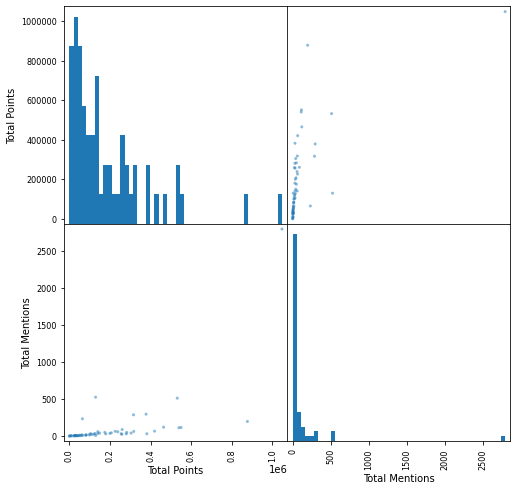

In [ ]:
#Plotting correlation between Reddit points and mentions

from pandas.plotting import scatter_matrix

sc_matrix = pd.concat([gme_reddit_df['total points'], gme_reddit_df['total mentions of GME']], axis = 1)
sc_matrix.columns = ['Total Points', 'Total Mentions']

scatter_matrix(sc_matrix, figsize=(8,8), hist_kwds={'bins':50})

# Analysis

As we can see from this scatter matrix, you can see that the data from the total points and total mentions form a bit of linearity. So that means that the two reddit attributes we will be getting have correlation.

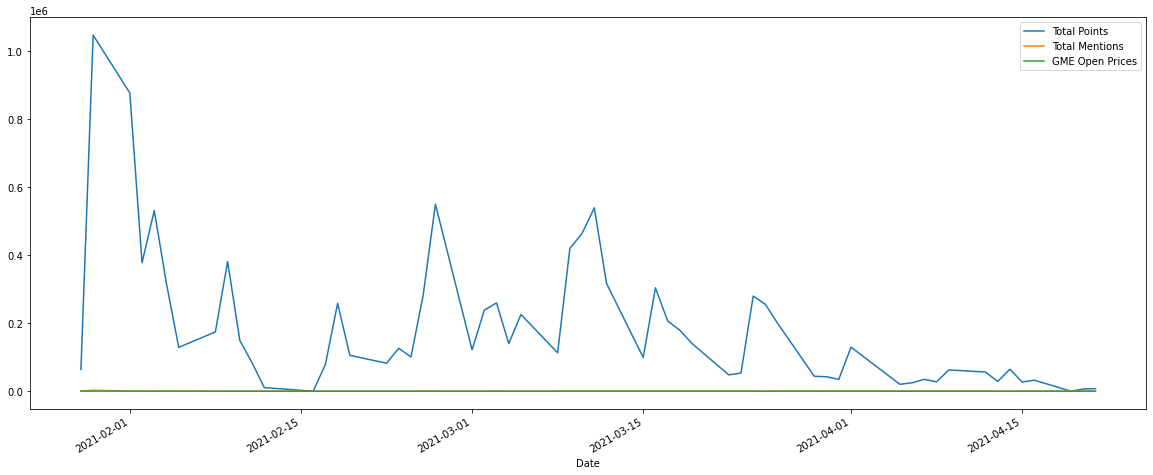

In [ ]:
#Plot graph with total points, mentions and GME open prices at certain dates
gme_reddit_df['total points'].plot(label = 'Total Points', figsize=(20,8))
gme_reddit_df['total mentions of GME'].plot(label = 'Total Mentions')
gme['Open'].plot(label='GME Open Prices')
plt.legend()

# Analysis
Since it's a bit difficult to see, I will need to graph a scatter matrix to maybe find correlation

array([[<AxesSubplot:xlabel='GME Open', ylabel='GME Open'>,
        <AxesSubplot:xlabel='Total Points', ylabel='GME Open'>],
       [<AxesSubplot:xlabel='GME Open', ylabel='Total Points'>,
        <AxesSubplot:xlabel='Total Points', ylabel='Total Points'>]],
      dtype=object)

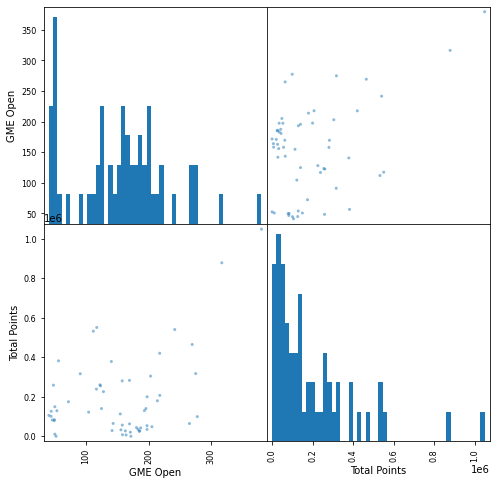

In [ ]:
from pandas.plotting import scatter_matrix

sc_matrix = pd.concat([gme['Open'], gme_reddit_df['total points']], axis = 1)
sc_matrix.columns = ['GME Open','Total Points']

scatter_matrix(sc_matrix, figsize=(8,8), hist_kwds={'bins':50})

# Analysis

Looking at the Scatter matrix there isn't a strong correlation. While the attributes all are having a positive trend. The scatter plots are pretty far apart. 

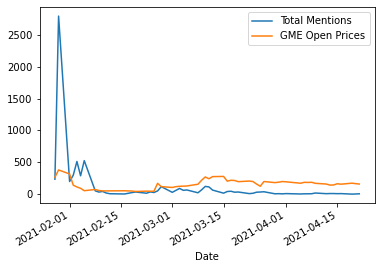

In [ ]:
#Graphing total mentions and GME open prices
gme_reddit_df['total mentions of GME'].plot(label = 'Total Mentions')
gme['Open'].plot(label='GME Open Prices')
plt.legend()

Here when comparing the total time $GME is mentioned along with the GME open prices seem to match a bit. 

# Conclusion

Currently it looks like the total mentions and GME open prices go hand in hand, and they seem to be on a stable trend. So I will be buying into the GME stock.